## Exploration des données:

In [303]:
import pandas as pd
import matplotlib.pyplot as plt
import os

### Chargement des données

étant donné notre grand nombre de tables, pour faciliter l'exploration des données, nous les stockons dans un dictionnaire de dataFrames pandas.

In [304]:
dfs = {}

for filename in os.listdir("csv/"):
    if not filename.endswith("csv"):
        continue
    name = filename.replace(".csv", "")
    dfs[name] = pd.read_csv("csv/" + filename)

## Statistiques descriptives:

### Forme des tables:

In [305]:
for name, value in dfs.items():
    print(name + ": ", value.shape)

characters:  (152898, 3)
directors:  (40933, 2)
genres:  (85426, 2)
knownformovies:  (252924, 2)
movies:  (36859, 8)
persons:  (145847, 4)
principals:  (361863, 5)
professions:  (318014, 2)
ratings:  (36859, 3)
titles:  (775705, 8)
writers:  (82857, 2)


### Types

Nous pouvons voir chaque colonne et le type de données qu'elle contiennent. à noter qu'ici, les strings seront notés comme object.

In [306]:
for name, value in dfs.items():
    print("--------------" + name + "--------------")
    print(value.dtypes)

--------------characters--------------
mid     object
pid     object
name    object
dtype: object
--------------directors--------------
mid    object
pid    object
dtype: object
--------------genres--------------
mid      object
genre    object
dtype: object
--------------knownformovies--------------
pid    object
mid    object
dtype: object
--------------movies--------------
mid                object
titleType          object
primaryTitle       object
originalTitle      object
isAdult             int64
startYear           int64
endYear           float64
runtimeMinutes    float64
dtype: object
--------------persons--------------
pid             object
primaryName     object
birthYear      float64
deathYear      float64
dtype: object
--------------principals--------------
mid         object
ordering     int64
pid         object
category    object
job         object
dtype: object
--------------professions--------------
pid        object
jobName    object
dtype: object
--------------ratin

On observe plusieurs champ redondant: "isAdult" qui est déjà explicité dans la table genres. Les champs sur le titre dans movies qui devraient être dans la table titles.

### Valeurs nulles

Voyons le nombre de valeurs manquantes dans chaque table.

In [307]:
for name, value in dfs.items():
    print("--------------" + name + "--------------")
    print(value.isnull().sum())

--------------characters--------------
mid     0
pid     0
name    0
dtype: int64
--------------directors--------------
mid    0
pid    0
dtype: int64
--------------genres--------------
mid      0
genre    0
dtype: int64
--------------knownformovies--------------
pid    0
mid    0
dtype: int64
--------------movies--------------
mid                   0
titleType             0
primaryTitle          0
originalTitle         0
isAdult               0
startYear             0
endYear           36859
runtimeMinutes       40
dtype: int64
--------------persons--------------
pid                 0
primaryName         0
birthYear       80311
deathYear      123826
dtype: int64
--------------principals--------------
mid              0
ordering         0
pid              0
category         0
job         252305
dtype: int64
--------------professions--------------
pid           0
jobName    3235
dtype: int64
--------------ratings--------------
mid              0
averageRating    0
numVotes         0
dty

On observe que le nombre de valeurs nulle dans le champ "endYear" de la table movies est égal au nombre d'éléments de movies. Ce champ est donc entièrement nul est pourrait être supprimé. 

### Nombre de valeurs uniques

In [308]:
for name, value in dfs.items():
    print("--------------" + name + "--------------")
    print(value.nunique())

--------------characters--------------
mid     36649
pid     59864
name    98511
dtype: int64
--------------directors--------------
mid    36851
pid    16956
dtype: int64
--------------genres--------------
mid      36857
genre       25
dtype: int64
--------------knownformovies--------------
pid    128407
mid     35444
dtype: int64
--------------movies--------------
mid               36859
titleType             1
primaryTitle      34406
originalTitle     35206
isAdult               1
startYear           111
endYear               0
runtimeMinutes      223
dtype: int64
--------------persons--------------
pid            145847
primaryName    143706
birthYear         286
deathYear         231
dtype: int64
--------------principals--------------
mid          36859
ordering        10
pid         144902
category        12
job           5099
dtype: int64
--------------professions--------------
pid        145847
jobName        38
dtype: int64
--------------ratings--------------
mid              3

On confirme "endYear" ne contient bien aucune valeur. Dans movies "titleType" ne contient qu'un seul type de valeur, là où dans titles, "type" contient 22 valeurs différentes, ce qui est étrange également.

## Analyse exploratoire:

### Distribution des films par année

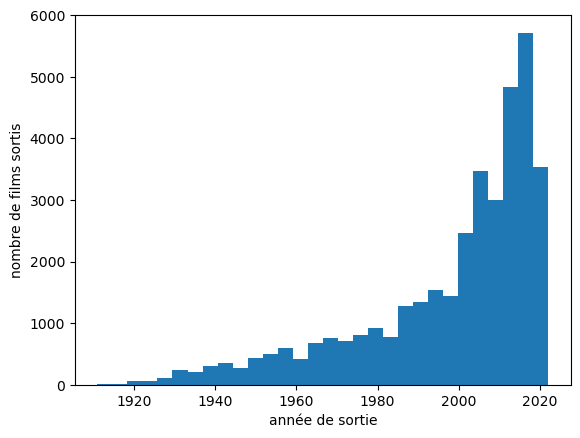

In [309]:
movies = dfs["movies"]


plt.hist(movies["startYear"], bins=30)
plt.xlabel("année de sortie")
plt.ylabel("nombre de films sortis")
plt.show()

On peut déjà observer certaines tendances sur les données, par exemple on voit que la quantité de films produits semble augmenter exponentiellement au fil des années, on observe également une chute du nombre de films produits au début du confinement.
### 10 genres les plus fréquentés

In [310]:
genres = dfs["genres"]

print(genres["genre"].value_counts().head(10))

genre
Drama        20019
Comedy       12596
Action        6730
Romance       6378
Crime         5986
Thriller      5595
Horror        4752
Adventure     4114
Mystery       2875
Fantasy       2040
Name: count, dtype: int64


On observe principalement deux genres prédominants: le Drama et la comédie.
### Distribution des notes

<function matplotlib.pyplot.show(close=None, block=None)>

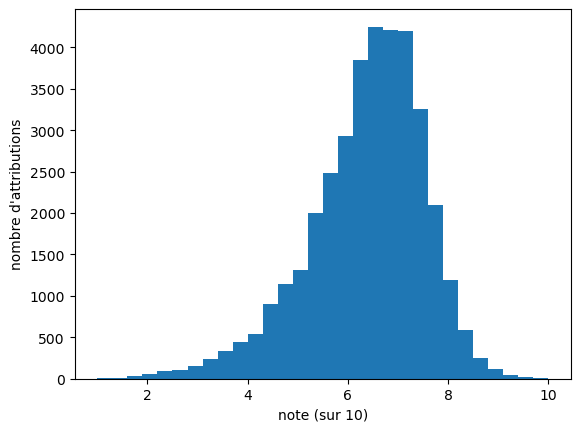

In [311]:
ratings = dfs["ratings"]


plt.hist(ratings["averageRating"], bins=30)
plt.xlabel("note (sur 10)")
plt.ylabel("nombre d'attributions")
plt.show

La distribution semble ressembler à une gaussienne centrée en 7, la plupart des notes se situant entre 5 et 8.
### Moyenne d'acteurs par film

In [312]:
characters = dfs["characters"]

print(characters.groupby("mid").count().mean())

pid     4.171956
name    4.171956
dtype: float64


On observe une moyenne de 4,17 acteurs par films. On remarque également que, en moyenne chaque film à autant d'acteurs que de personnages, un résultat logique étant donné que peu de films font jouer deux personnages par un même acteur ou utilisent deux acteurs pour un seul personnage.

## Relations entre tables:

### Clé mid:



In [313]:
print("----------mid counts----------")
for name, value in dfs.items():
    if "mid" in value.columns:
        print(name + " :", value["mid"].nunique())

----------mid counts----------
characters : 36649
directors : 36851
genres : 36857
knownformovies : 35444
movies : 36859
principals : 36859
ratings : 36859
titles : 36859
writers : 35988


A prioris, tous les films doivent être dans movies, donc aucune valeur de mid qui n'existe pas dans movies ne devrait se trouver comme clé étrangère dans les autres tables.

In [314]:
for name, value in dfs.items():
    if "mid" in value.columns:
        print("-------------" + name + "-------------")
        mergedDf = pd.merge(value, movies, how="outer", on="mid", indicator=True)
        print("clés orphelines: ", mergedDf.where(mergedDf["_merge"] == "left_only")["mid"].nunique())
        print("clés manquantes: ", mergedDf.where(mergedDf["_merge"] == "right_only")["mid"].nunique())

-------------characters-------------
clés orphelines:  0
clés manquantes:  210
-------------directors-------------
clés orphelines:  0
clés manquantes:  8
-------------genres-------------
clés orphelines:  0
clés manquantes:  2
-------------knownformovies-------------
clés orphelines:  0
clés manquantes:  1415
-------------movies-------------
clés orphelines:  0
clés manquantes:  0
-------------principals-------------
clés orphelines:  0
clés manquantes:  0
-------------ratings-------------
clés orphelines:  0
clés manquantes:  0
-------------titles-------------
clés orphelines:  0
clés manquantes:  0
-------------writers-------------
clés orphelines:  0
clés manquantes:  871


On remarque qu'il n'y a aucune valeur orpheline pour la clé mid, heureusement puisque cela poserait des vrais problèmes de logique, la table movies étant censée être exhaustive et contenir tous les films.

En revanche, tous les films ne sont pas présents dans les tables characters, directors, genres, knownformovies et writers.
Pour knownformovies, cela ne correspond pas à des données manquantes, puisque tous les films n'ont pas forcéments fait connaître des personnes.
Par contre, pour les tables restantes, cela correspond bien à des informations manquantes pour certains films et il faudra le garder à l'esprit lorsque l'on manipulera notre base de données.

### clé pid:

In [315]:
print("----------pid counts----------")
for name, value in dfs.items():
    if "pid" in value.columns:
        print(name + " :", value["pid"].nunique())

----------pid counts----------
characters : 59864
directors : 16956
knownformovies : 128407
persons : 145847
principals : 144902
professions : 145847
writers : 38841


#### Clés orphelines:

In [316]:
persons = dfs["persons"]

for name, value in dfs.items():
    if "pid" in value.columns:
        print("-------------" + name + "-------------")
        mergedDf = pd.merge(value, persons, how="outer", on="pid", indicator=True)
        print("clés orphelines: ", mergedDf.where(mergedDf["_merge"] == "left_only")["pid"].nunique())

-------------characters-------------
clés orphelines:  5
-------------directors-------------
clés orphelines:  0
-------------knownformovies-------------
clés orphelines:  0
-------------persons-------------
clés orphelines:  0
-------------principals-------------
clés orphelines:  5
-------------professions-------------
clés orphelines:  0
-------------writers-------------
clés orphelines:  2


Ici, il existe bien des clés orphelines: 5 dans characters, 5 dans principals et 2 dans writers:

In [317]:
# Valeurs des clés orphelines
for name, value in dfs.items():
    if "pid" in value.columns:
        mergedDf = pd.merge(value, persons, how="outer", on="pid", indicator=True)
        mergedDf = mergedDf[mergedDf["_merge"] == "left_only"]["pid"]
        if not mergedDf.empty:
            print("-------------" + name + "-------------")
            print(mergedDf)


-------------characters-------------
118321     nm0706571
152866    nm10893293
165312    nm13465907
165313    nm13465909
165314    nm13465910
Name: pid, dtype: object
-------------principals-------------
192176     nm0706571
249620    nm10893293
267034    nm13465907
267035    nm13465909
267036    nm13465910
Name: pid, dtype: object
-------------writers-------------
90556      nm0799875
121204    nm12985319
Name: pid, dtype: object


On remarque que les 5 clés orphelines dans characters et principals correspondent aux mêmes personnes, cela pourrait être intéressant de rajouter les entrées correspondantes dans persons.
Dans writers, les clés orphelines existent uniquement dans cette table.

### Clés manquantes:

In [318]:
for name, value in dfs.items():
    if "pid" in value.columns:
        print("-------------" + name + "-------------")
        mergedDf = pd.merge(value, persons, how="outer", on="pid", indicator=True)
        print("clés manquantes: ", mergedDf.where(mergedDf["_merge"] == "right_only")["pid"].nunique())

-------------characters-------------
clés manquantes:  85988
-------------directors-------------
clés manquantes:  128891
-------------knownformovies-------------
clés manquantes:  17440
-------------persons-------------
clés manquantes:  0
-------------principals-------------
clés manquantes:  950
-------------professions-------------
clés manquantes:  0
-------------writers-------------
clés manquantes:  107008


Ici, les nombreuses clés manquantes ne compromettent pas l'intégrité de nos données, étant donné que toutes les personnes n'exercents pas toutes les professions et ne ce sont pas forcément fait connaître par un film particulier. On remarque également que chaque personne à bien une profession associée.